In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms

figlabel = (('(a)', '(b)'), 
            ('(c)', '(d)'))

In [2]:
ene = np.loadtxt('analytical_ene.dat', comments='#')
force = np.loadtxt('analytical_force.dat', comments='#')

In [3]:
x = ene[:,0]
ene_fpga = ene[:,1]
ene_cpu = ene[:,2]
ene_gpu = ene[:,3]

force_fpga = force[:,1]
force_cpu = force[:,2]
force_gpu = force[:,3]

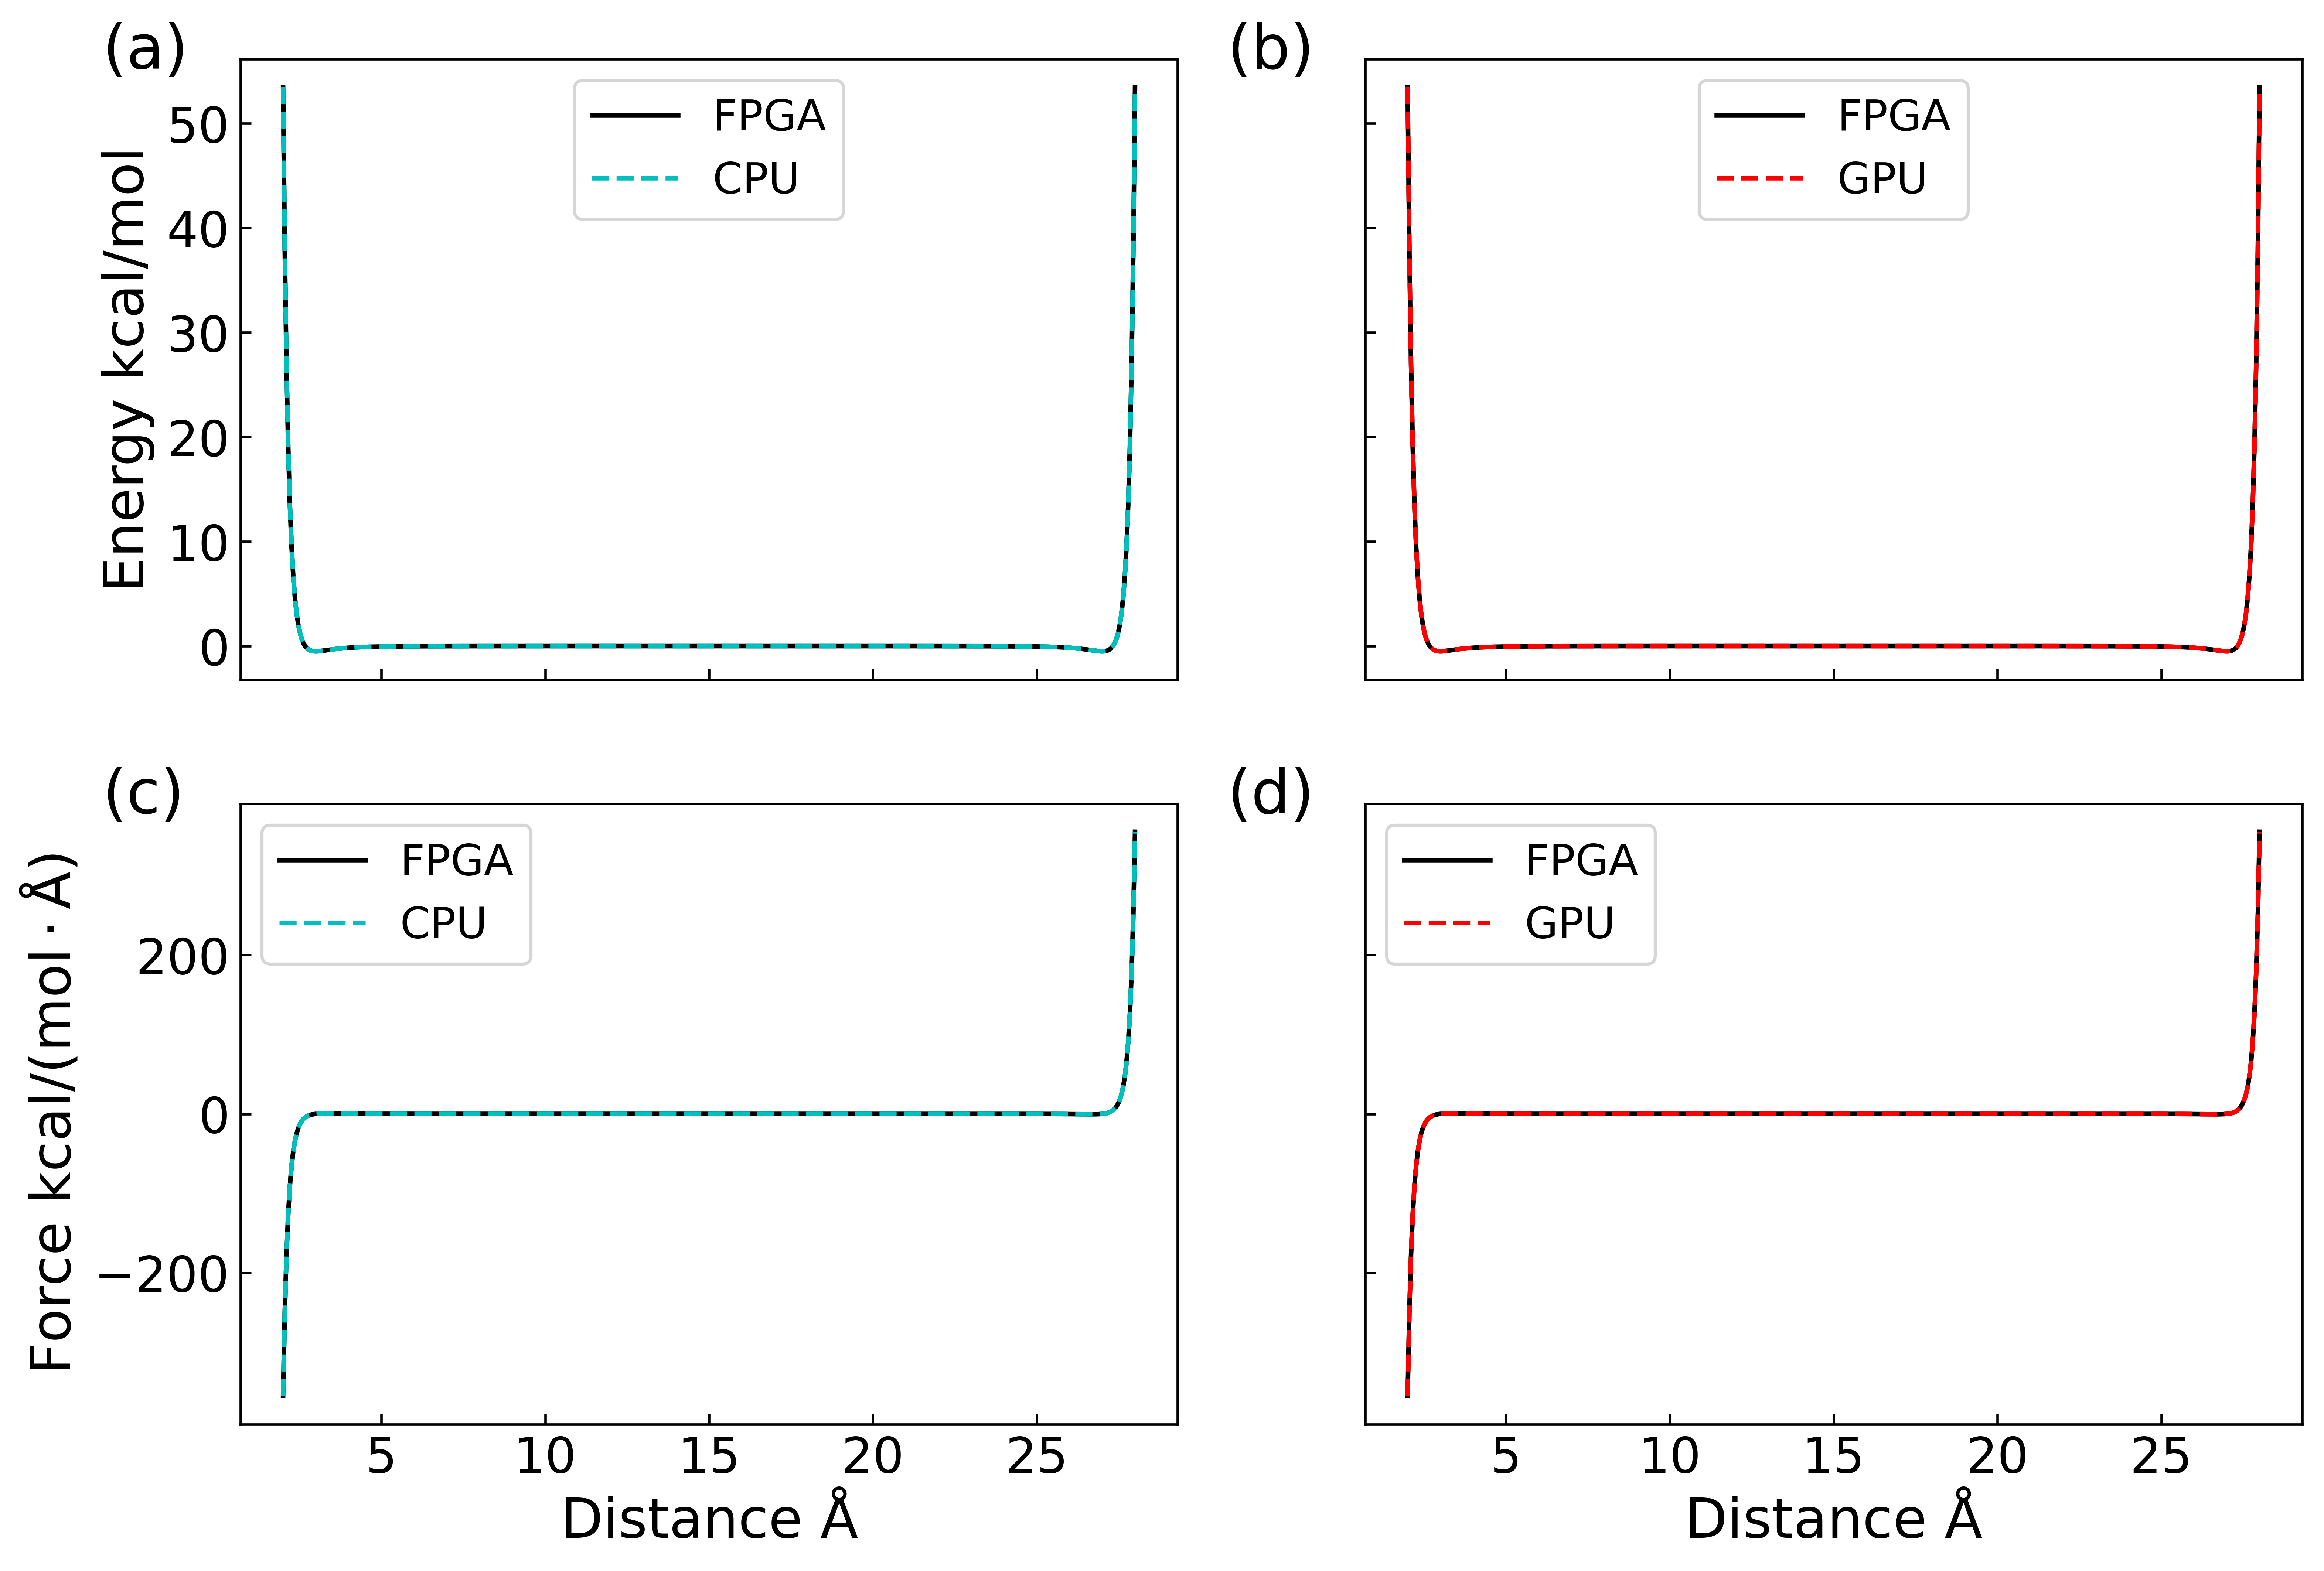

In [4]:
fig,axs = plt.subplots(2,2, figsize=(12,8),sharex=True,sharey='row',dpi=600)
#fig.subplots_adjust(wspace=0.1,hspace=0.1)
trans = mtransforms.ScaledTranslation(10/72, 10/72, fig.dpi_scale_trans)
   
# energy
axs[0][0].plot(x, ene_fpga, ls='-', c='k', label='FPGA')
axs[0][1].plot(x, ene_fpga, ls='-', c='k', label='FPGA')

axs[0][0].plot(x, ene_cpu, ls='--', c='c', label='CPU')
axs[0][1].plot(x, ene_gpu, ls='--', c='r', label='GPU')

axs[0][0].text(-0.18, 1.01, figlabel[0][0], 
                transform=axs[0][0].transAxes + trans,
                fontsize=20, verticalalignment='top', fontfamily='sans-serif')
axs[0][1].text(-0.18, 1.01, figlabel[0][1], 
                transform=axs[0][1].transAxes + trans,
                fontsize=20, verticalalignment='top', fontfamily='sans-serif')
# force
axs[1][0].plot(x, force_fpga, ls='-', c='k', label='FPGA')
axs[1][1].plot(x, force_fpga, ls='-', c='k', label='FPGA')

axs[1][0].plot(x, force_cpu, ls='--', c='c', label='CPU')
axs[1][1].plot(x, force_gpu, ls='--', c='r', label='GPU')

axs[1][0].text(-0.18, 1.01, figlabel[1][0], 
                transform=axs[1][0].transAxes + trans,
                fontsize=20, verticalalignment='top', fontfamily='sans-serif')
axs[1][1].text(-0.18, 1.01, figlabel[1][1], 
                transform=axs[1][1].transAxes + trans,
                fontsize=20, verticalalignment='top', fontfamily='sans-serif')
# ax.indicate_inset_zoom(axins, edgecolor="black")
axs[0][0].legend(fontsize=14)
axs[0][1].legend(fontsize=14)
axs[1][0].legend(fontsize=14)
axs[1][1].legend(fontsize=14)

axs[1][0].set_xlabel(r'Distance $\rm \AA$', fontsize=18)
axs[1][1].set_xlabel(r'Distance $\rm \AA$', fontsize=18)

axs[0][0].set_ylabel(r'Energy kcal/mol', fontsize=18)
axs[1][0].set_ylabel(r'Force kcal/(mol$\rm \cdot \AA$)', fontsize=18)


axs[0][0].tick_params('both', labelsize=16)
axs[0][1].tick_params('both', labelsize=16)
axs[1][0].tick_params('both', labelsize=16)
axs[1][1].tick_params('both', labelsize=16)



plt.show()

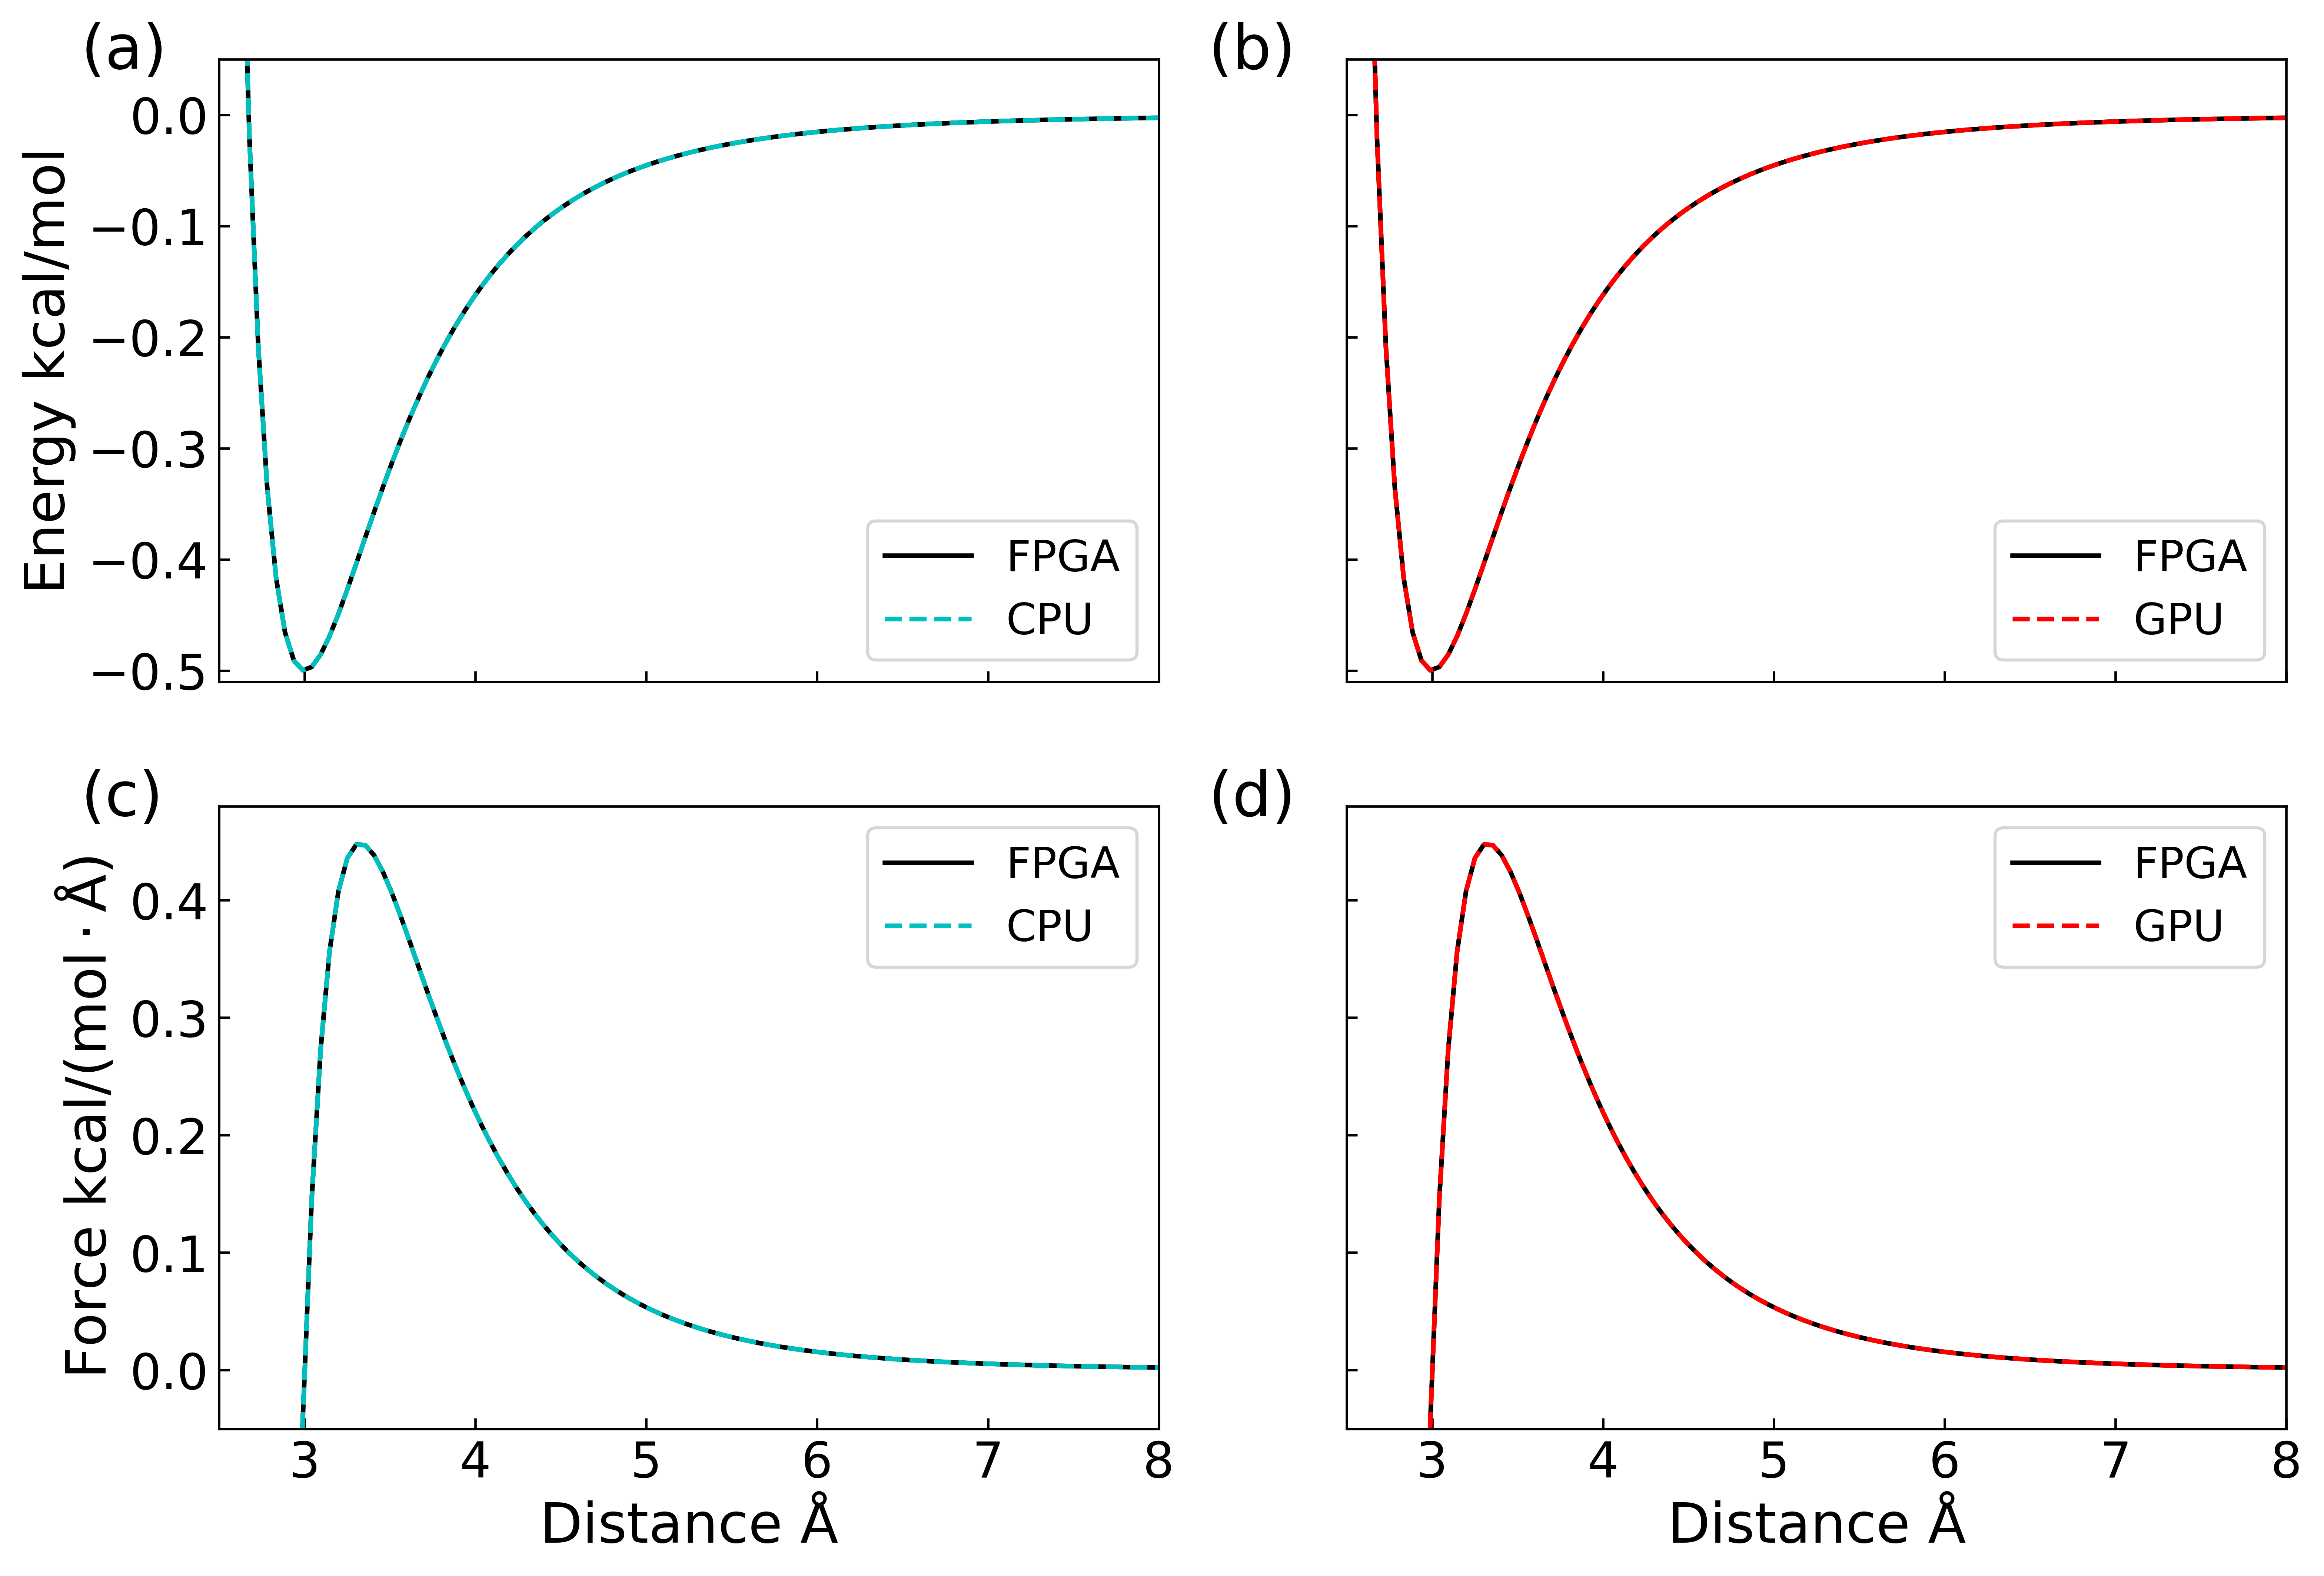

In [5]:
fig,axs = plt.subplots(2,2, figsize=(12,8),sharex=True,sharey='row',dpi=600)
trans = mtransforms.ScaledTranslation(10/72, 10/72, fig.dpi_scale_trans)


# energy
axs[0][0].plot(x, ene_fpga, ls='-', c='k', label='FPGA')
axs[0][1].plot(x, ene_fpga, ls='-', c='k', label='FPGA')

axs[0][0].plot(x, ene_cpu, ls='--', c='c', label='CPU')
axs[0][1].plot(x, ene_gpu, ls='--', c='r', label='GPU')

axs[0][0].text(-0.18, 1.01, figlabel[0][0], 
                transform=axs[0][0].transAxes + trans,
                fontsize=20, verticalalignment='top', fontfamily='sans-serif')
axs[0][1].text(-0.18, 1.01, figlabel[0][1], 
                transform=axs[0][1].transAxes + trans,
                fontsize=20, verticalalignment='top', fontfamily='sans-serif')
# force
axs[1][0].plot(x, force_fpga, ls='-', c='k', label='FPGA')
axs[1][1].plot(x, force_fpga, ls='-', c='k', label='FPGA')

axs[1][0].plot(x, force_cpu, ls='--', c='c', label='CPU')
axs[1][1].plot(x, force_gpu, ls='--', c='r', label='GPU')

axs[1][0].text(-0.18, 1.01, figlabel[1][0], 
                transform=axs[1][0].transAxes + trans,
                fontsize=20, verticalalignment='top', fontfamily='sans-serif')
axs[1][1].text(-0.18, 1.01, figlabel[1][1], 
                transform=axs[1][1].transAxes + trans,
                fontsize=20, verticalalignment='top', fontfamily='sans-serif')

axs[0][0].set_xlim(2.5, 8.)
axs[0][0].set_ylim(-0.51, 5e-2)
axs[1][0].set_ylim(-5e-2, 0.48)


# ax.indicate_inset_zoom(axins, edgecolor="black")
axs[0][0].legend(fontsize=14)
axs[0][1].legend(fontsize=14)
axs[1][0].legend(fontsize=14)
axs[1][1].legend(fontsize=14)

axs[1][0].set_xlabel(r'Distance $\rm \AA$', fontsize=18)
axs[1][1].set_xlabel(r'Distance $\rm \AA$', fontsize=18)

axs[0][0].set_ylabel(r'Energy kcal/mol', fontsize=18)
axs[1][0].set_ylabel(r'Force kcal/(mol$\rm \cdot \AA$)', fontsize=18)


axs[0][0].tick_params('both', labelsize=16)
axs[0][1].tick_params('both', labelsize=16)
axs[1][0].tick_params('both', labelsize=16)
axs[1][1].tick_params('both', labelsize=16)

plt.show()

In [6]:
print(f'{np.sqrt(np.average((ene_fpga-ene_gpu)**2)):.3e}')
print(f'{np.sqrt(np.average((ene_fpga-ene_cpu)**2)):.3e}')


8.466e-06
0.000e+00


In [7]:
print(f'{np.sqrt(np.average((force_fpga-force_gpu)**2)):.3e}')
print(f'{np.sqrt(np.average((force_fpga-force_cpu)**2)):.3e}')

5.697e-05
0.000e+00


## combine 

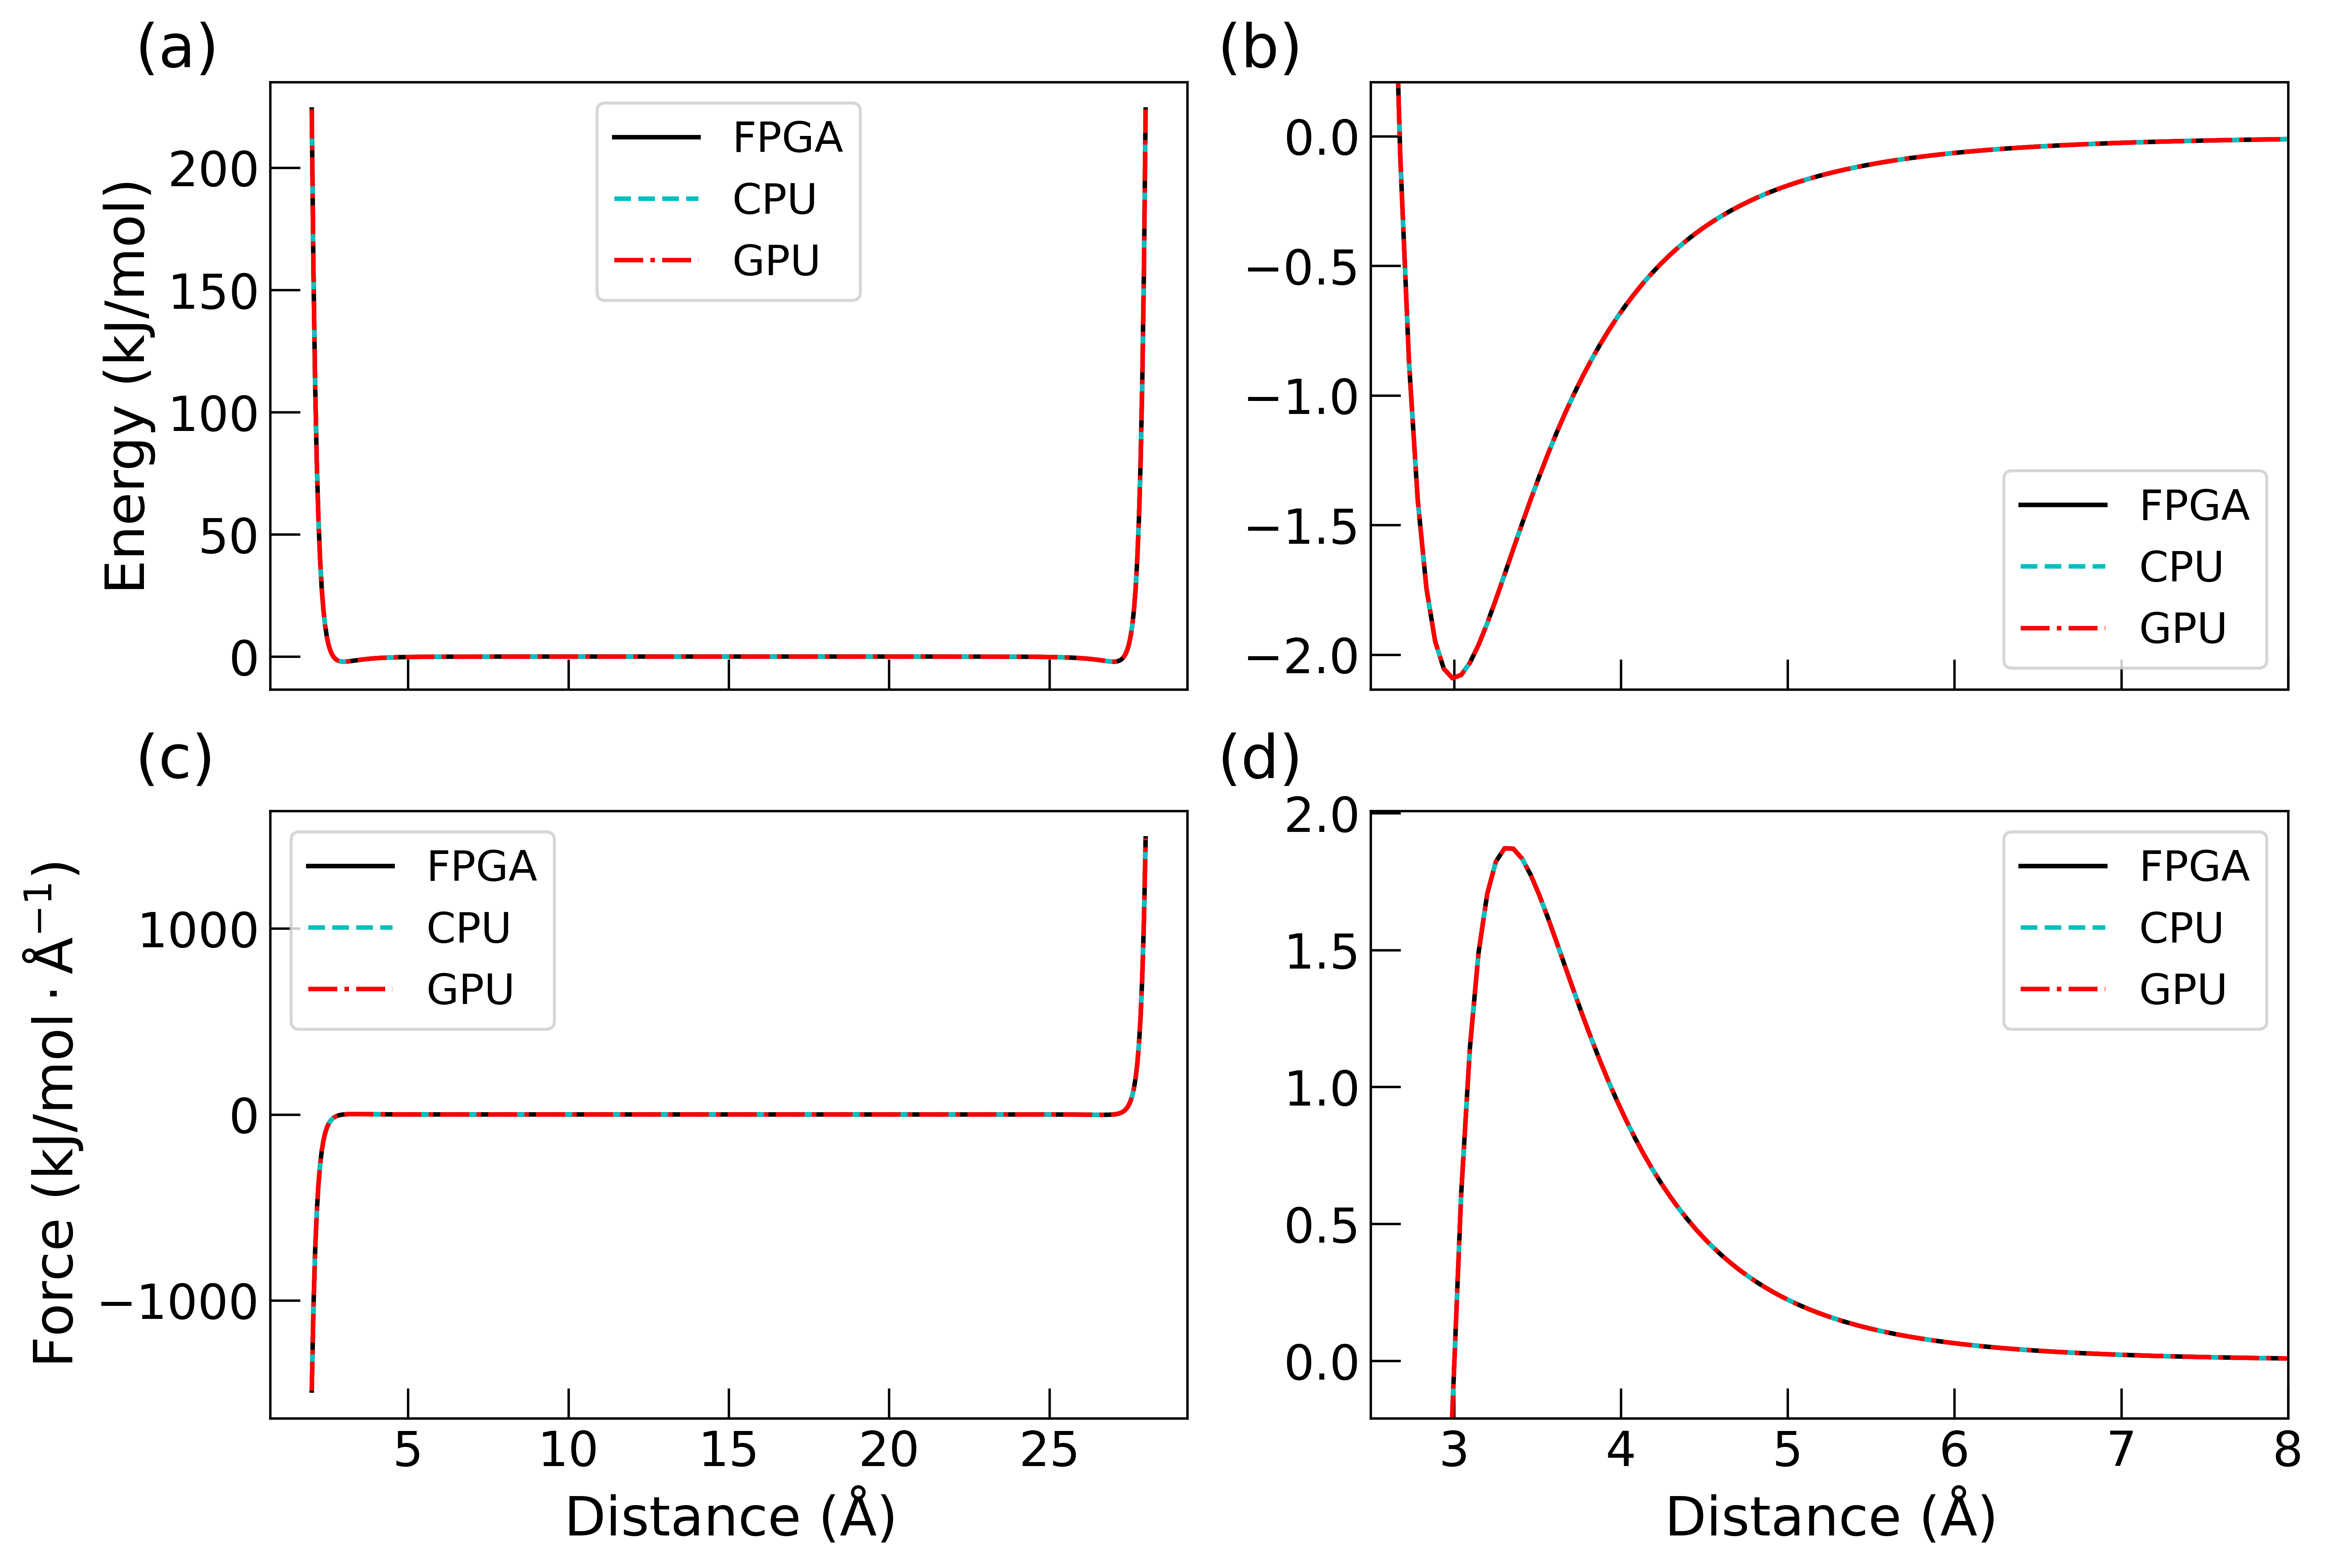

In [9]:
fig,axs = plt.subplots(2,2, figsize=(12,8),sharex='col', sharey=False, dpi=600)
#fig.subplots_adjust(wspace=0.1,hspace=0.1)
trans = mtransforms.ScaledTranslation(10/72, 10/72, fig.dpi_scale_trans)
   
# energy
axs[0][0].plot(x, ene_fpga*4.184, ls='-', c='k', label='FPGA')
axs[0][0].plot(x, ene_cpu*4.184, ls='--', c='c', label='CPU')
axs[0][0].plot(x, ene_gpu*4.184, ls='-.', c='r', label='GPU')

axs[0][1].plot(x, ene_fpga*4.184, ls='-', c='k', label='FPGA')
axs[0][1].plot(x, ene_cpu*4.184, ls='--', c='c', label='CPU')
axs[0][1].plot(x, ene_gpu*4.184, ls='-.', c='r', label='GPU')

axs[0][0].text(-0.18, 1.05, figlabel[0][0], 
                transform=axs[0][0].transAxes + trans,
                fontsize=20, verticalalignment='top', fontfamily='sans-serif')
axs[0][1].text(-0.20, 1.05, figlabel[0][1], 
                transform=axs[0][1].transAxes + trans,
                fontsize=20, verticalalignment='top', fontfamily='sans-serif')
# force
axs[1][0].plot(x, force_fpga*4.184, ls='-', c='k', label='FPGA')
axs[1][0].plot(x, force_cpu*4.184, ls='--', c='c', label='CPU')
axs[1][0].plot(x, force_gpu*4.184, ls='-.', c='r', label='GPU')

axs[1][1].plot(x, force_fpga*4.184, ls='-', c='k', label='FPGA')
axs[1][1].plot(x, force_cpu*4.184, ls='--', c='c', label='CPU')
axs[1][1].plot(x, force_gpu*4.184, ls='-.', c='r', label='GPU')

axs[1][0].text(-0.18, 1.08, figlabel[1][0], 
                transform=axs[1][0].transAxes + trans,
                fontsize=20, verticalalignment='top', fontfamily='sans-serif')
axs[1][1].text(-0.20, 1.08, figlabel[1][1], 
                transform=axs[1][1].transAxes + trans,
                fontsize=20, verticalalignment='top', fontfamily='sans-serif')
# ax.indicate_inset_zoom(axins, edgecolor="black")
axs[0][0].legend(fontsize=14)
axs[0][1].legend(fontsize=14)
axs[1][0].legend(fontsize=14)
axs[1][1].legend(fontsize=14)

axs[1][0].set_xlabel(r'Distance ($\rm \AA$)', fontsize=18)
axs[1][1].set_xlabel(r'Distance ($\rm \AA$)', fontsize=18)

axs[0][0].set_ylabel(r'Energy (kJ/mol)', fontsize=18)
axs[1][0].set_ylabel(r'Force (kJ/mol$\rm \cdot {\AA}^{-1}$)', fontsize=18)


axs[0][1].set_xlim(2.5, 8.)
axs[0][1].set_ylim(-0.51*4.184, 5e-2*4.184)
axs[1][1].set_ylim(-5e-2*4.184, 0.48*4.184)

axs[0][0].tick_params('both', labelsize=16, size=10)
axs[0][1].tick_params('both', labelsize=16, size=10)
axs[1][0].tick_params('both', labelsize=16, size=10)
axs[1][1].tick_params('both', labelsize=16, size=10)



plt.show()